In [1]:
from kan import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.datasets import make_moons

In [2]:
np.random.seed(0)

### Usando fórmula

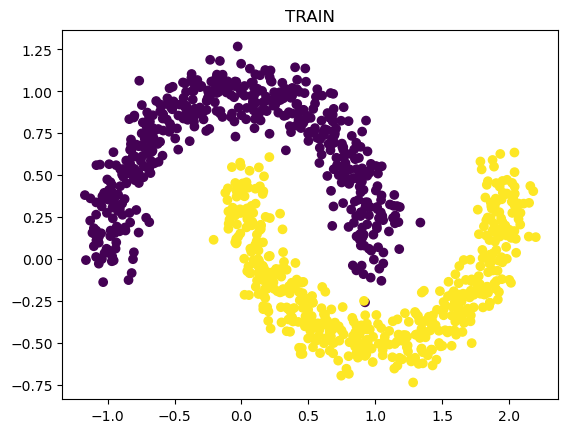

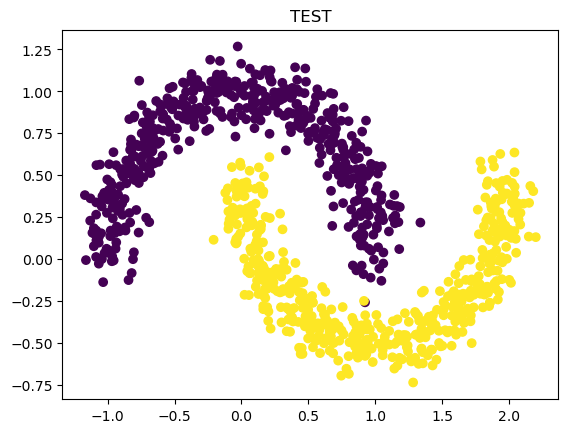

In [3]:
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)

dtype = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input).type(dtype)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype)
dataset['train_label'] = torch.from_numpy(train_label[:, None]).type(dtype)
dataset['test_label'] = torch.from_numpy(test_label[:, None]).type(dtype)

X = dataset['train_input']
y = dataset['train_label']
plt.figure()
plt.scatter(dataset['train_input'][:, 0], dataset['train_input'][:, 1], c=dataset['train_label'])
plt.title('TRAIN')
plt.show()
plt.figure()
plt.scatter(dataset['test_input'][:, 0], dataset['test_input'][:, 1], c=dataset['test_label'])
plt.title('TEST')
plt.show()

In [29]:
# [2,5,1] means 2 inputs, 5 hidden add neurons, and 1 output
# [2,[5,2],1] means 2 inputs, 5 hidden add neurons and 2 hidden multiplication neurons, and 1 output.
model = KAN(width=[2, [3, 3], 1], grid=3, k=3)


model_results = model.fit(dataset, opt="LBFGS", steps=100)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.51e-02 | test_loss: 3.51e-02 | reg: 2.95e+01 | : 100%|█| 100/100 [00:26<00:00,  3.76

saving model version 0.1


In [ ]:
# model.plot()  # semi quebrado na 0.2.1

In [30]:
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'tan', 'abs', 'cos']
model.auto_symbolic(lib=lib)  # semi quebrado na 0.2.1: pesa muito o c, se nao passar a lib quase tudo vira 0
formula = model.symbolic_formula()[0][0]

fixing (0,0,0) with sin, r2=0.9992561340332031, c=2
fixing (0,0,1) with sin, r2=0.9965055584907532, c=2
fixing (0,0,2) with sin, r2=0.9965918660163879, c=2
fixing (0,0,3) with sin, r2=0.9980074763298035, c=2
fixing (0,0,4) with sin, r2=0.995335042476654, c=2
fixing (0,0,5) with x, r2=0.4339448809623718, c=1
fixing (0,0,6) with x, r2=0.9481340050697327, c=1
fixing (0,0,7) with x, r2=0.37128981947898865, c=1
fixing (0,0,8) with cos, r2=0.9829006195068359, c=2
fixing (0,1,0) with sin, r2=0.9993732571601868, c=2
fixing (0,1,1) with cos, r2=0.9996338486671448, c=2
fixing (0,1,2) with sin, r2=0.9995096921920776, c=2
fixing (0,1,3) with x, r2=0.04211299493908882, c=1
fixing (0,1,4) with x, r2=0.9906163811683655, c=1
fixing (0,1,5) with cos, r2=0.9450257420539856, c=2
fixing (0,1,6) with sin, r2=0.9986298084259033, c=2
fixing (0,1,7) with exp, r2=0.9977244138717651, c=2
fixing (0,1,8) with x, r2=0.7187241911888123, c=1
fixing (1,0,0) with exp, r2=0.9860561490058899, c=2
fixing (1,1,0) with exp

In [31]:
formula

1.34163805452394*(-(-1.02973508834839*x_2 - 0.269963592290878*sin(2.26095986366272*x_1 + 4.76639986038208) + 0.881981759984342)*(0.0453247178679117*x_2 - 0.913766741752625*sin(1.21599984169006*x_1 - 1.20663976669312) - 0.0448199849081021) - 0.326101446822283)**2 - 0.114844422234622*(0.704410538077354*x_1 - 2.54095227046078*exp(0.922160089015961*x_2) + 3.01457863987764)*(1.30149941391019*x_2 + 1.21407735347748*cos(2.39767980575562*x_1 + 9.59640026092529) - 2.24653037980006) + 0.014128241913292*exp(-2.89247888763953*sin(0.919280052185059*x_1 - 0.993759989738464) + 0.674065441274614*sin(1.74167966842651*x_2 + 5.80039978027344)) - 0.0477244585552696*exp(-2.75564216629186*sin(1.50159955024719*x_1 + 5.18287992477417) + 1.85173189176687*cos(1.60919988155365*x_2 + 6.98728036880493)) - 0.0942951347475374*sin(1.53455984592438*x_1 + 8.22047996520996) - 0.172704037025306*sin(1.43023955821991*x_2 - 3.80816006660461) - 0.601852536201477*cos(1.71927964687347*(-0.683058445716505*x_1 - 0.59173250198364

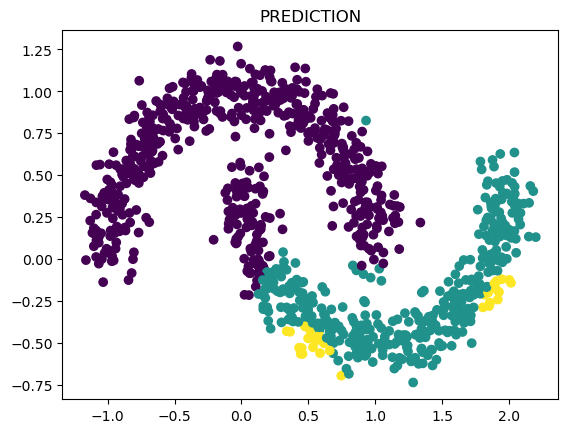

In [34]:
expr_func = sp.lambdify(['x_1', 'x_2'], formula, "numpy")
results = expr_func(dataset['test_input'][:, 0], dataset['test_input'][:, 1])
plt.figure()
plt.scatter(dataset['test_input'][:, 0], dataset['test_input'][:, 1], c=results)  # np.round(results,0)
plt.title('PREDICTION')
plt.show()

### Usando Dataset

# Comparando com MLP